In [2]:
# Paso 1: Se importan las librerías necesarias:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Paso 2: Se cargan  5 datasets, una para cada año, desde el 2016 al 2020. 

df1 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2016_accidents_causa_conductor_gu_bcn_.csv')
df2 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2017_accidents_causa_conductor_gu_bcn_.csv')
df3 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2018_accidents_causa_conductor_gu_bcn_.csv')
df4 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2019_accidents_causa_conductor_gu_bcn_.csv')
df5 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2020_accidents_causa_conductor_gu_bcn_.csv')

# Paso 3: Se juntan los 5 datasets en uno solo llamado df_unido a través de concat:

df_unido = pd.concat([df1, df2, df3, df4, df5], ignore_index = True )


In [3]:
# Paso 4: Se muestran la cantidad de filas y columnas:

print(f"El conjunto de datos tiene {df_unido.shape[0]} filas y {df_unido.shape[1]} columnas.")

El conjunto de datos tiene 51056 filas y 20 columnas.


In [4]:
# Paso 5: Se muestran la cantidad de valores nulos para cada campo:

print(df_unido.isnull().sum())

Numero_expedient               0
Codi_districte                 0
Nom_districte                  0
Codi_barri                     0
Nom_barri                      0
Codi_carrer                    0
Nom_carrer                     0
Num_postal                    15
Descripcio_dia_setmana         0
NK_Any                         0
Mes_any                        0
Nom_mes                        0
Dia_mes                        0
Hora_dia                       0
Descripcio_torn                0
Descripcio_causa_conductor     0
Coordenada_UTM_X_ED50          0
Coordenada_UTM_Y_ED50          0
Longitud                       0
Latitud                        0
dtype: int64


In [5]:
# Paso 6: Se muestra mayor información a cerca de los tipos de datos:

df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51056 entries, 0 to 51055
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numero_expedient            51056 non-null  object 
 1   Codi_districte              51056 non-null  int64  
 2   Nom_districte               51056 non-null  object 
 3   Codi_barri                  51056 non-null  int64  
 4   Nom_barri                   51056 non-null  object 
 5   Codi_carrer                 51056 non-null  int64  
 6   Nom_carrer                  51056 non-null  object 
 7   Num_postal                  51041 non-null  object 
 8   Descripcio_dia_setmana      51056 non-null  object 
 9   NK_Any                      51056 non-null  int64  
 10  Mes_any                     51056 non-null  int64  
 11  Nom_mes                     51056 non-null  object 
 12  Dia_mes                     51056 non-null  int64  
 13  Hora_dia                    510

In [6]:
# Paso 7: Se muestran las estadísticas del conjunto de datasets:

df_unido.describe()

,Codi_districte,Codi_barri,Codi_carrer,NK_Any,Mes_any,Dia_mes,Hora_dia,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
count,51056.000000,51056.000000,51056.000000,51056.000000,51056.000000,51056.00000,51056.000000,51056.000000,5.105600e+04,51056.000000,51056.000000
mean,4.746200,26.477299,236393.801923,2017.884519,6.492792,15.70027,13.788644,430104.049136,4.583629e+06,2.162889,41.399587
std,3.023498,22.058446,191332.667778,1.355844,3.489389,8.78807,5.303822,2011.134092,2.395604e+03,0.023947,0.021669
min,-1.000000,-1.000000,-1.000000,2016.000000,1.000000,1.00000,0.000000,422891.030000,4.575152e+06,2.077403,41.323094
25%,2.000000,8.000000,105304.000000,2017.000000,3.000000,8.00000,10.000000,428614.300000,4.582129e+06,2.145137,41.386044
50%,4.000000,19.000000,189202.000000,2018.000000,6.000000,16.00000,14.000000,430155.920000,4.583358e+06,2.163543,41.397163
75%,7.000000,43.000000,310904.000000,2019.000000,10.000000,23.00000,18.000000,431555.507500,4.584915e+06,2.180078,41.411283
max,10.000000,73.000000,701869.000000,2020.000000,12.000000,31.00000,23.000000,435136.400000,4.591264e+06,2.223468,41.468367


In [7]:
# Paso 8: Se muestran las primeras filas:

df_unido.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2016S008785,-1,Desconegut,-1,Desconegut,-1,NÚMERO 6 / A ...,Desconegut,Dimarts,2016,11,Novembre,15,22,Desobeir altres senyals,Nit,427519.99,4575229.36,2.165891,41.375166
1,2016S006269,-1,Desconegut,-1,Desconegut,-1,ALMIRALL CERVERA / Sevilla ...,Desconegut,Divendres,2016,8,Agost,12,8,No respectat pas de vianants,Matí,432316.21,4581276.81,2.154737,41.376367
2,2016S005498,-1,Desconegut,-1,Desconegut,-1,NÚMERO 3 / E ...,Desconegut,Dimecres,2016,7,Juliol,13,5,Altres,Nit,427265.97,4576644.81,2.157427,41.381284
3,2016S001172,-1,Desconegut,-1,Desconegut,-1,RDA DALT (BESÒS) ...,K00046,Diumenge,2016,2,Febrer,14,21,No respectar distàncies,Tarda,424991.14,4581760.18,2.157427,41.381284
4,2016S002566,10,Sant Martí,64,el Camp de l'Arpa del Clot,283200,Ripollès,0093 0093,Dimarts,2016,4,Abril,5,7,No determinada,Matí,432141.03,4585382.64,2.163156,41.381859


In [8]:
# Paso 9: Corrección:

# Se ha indentificado un error en la denominación de las columnas. En lugar de "Descripcio_torn" debería 
# decir "Descripcio_causa_conductor"; y viceversa. Se corrige:

df_unido.rename(columns={'Descripcio_torn': 'Descripcio_causa_conductor', 'Descripcio_causa_conductor': 'Descripcio_torn' }, inplace=True)


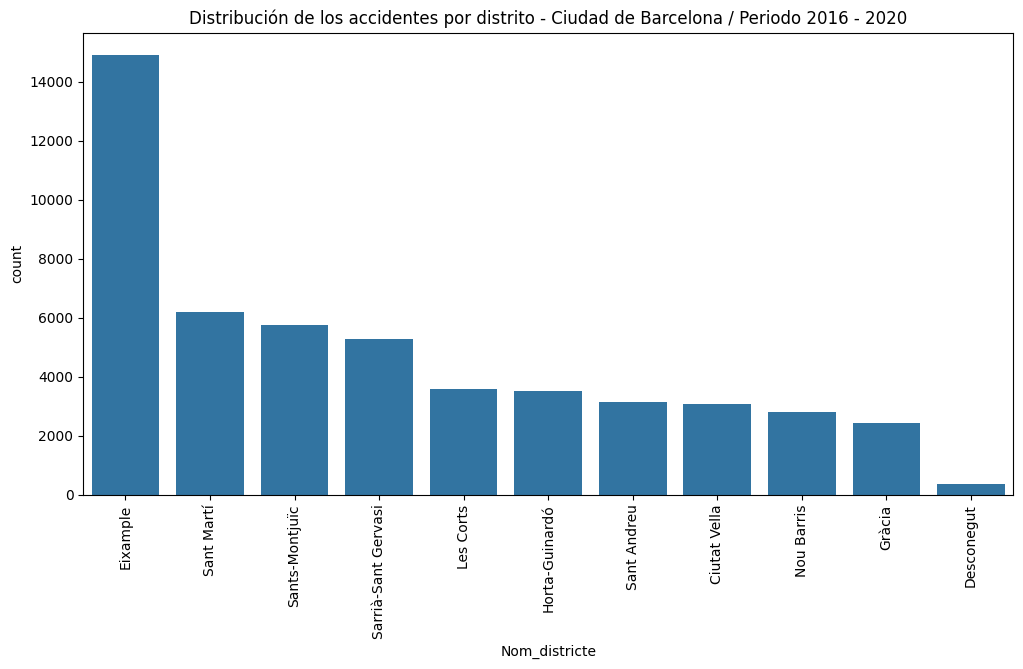

In [9]:
# Paso 10: Se muestra la distribución de frecuencias de los accidentes por distrito

plt.figure(figsize=(12, 6))
sns.countplot(data=df_unido, x='Nom_districte', order=df_unido['Nom_districte'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribución de los accidentes por distrito - Ciudad de Barcelona / Periodo 2016 - 2020')
plt.show()


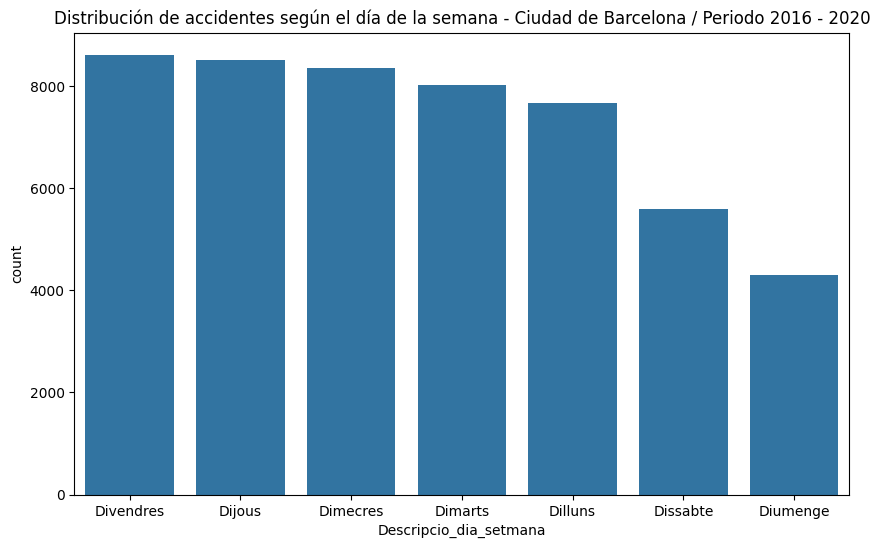

In [10]:
# Paso 11: Se muestra la distribución de frecuencias accidentes según el día de la semana

plt.figure(figsize=(10, 6))
sns.countplot(data=df_unido, x='Descripcio_dia_setmana', order=df_unido['Descripcio_dia_setmana'].value_counts().index)
plt.title('Distribución de accidentes según el día de la semana - Ciudad de Barcelona / Periodo 2016 - 2020')
plt.show()

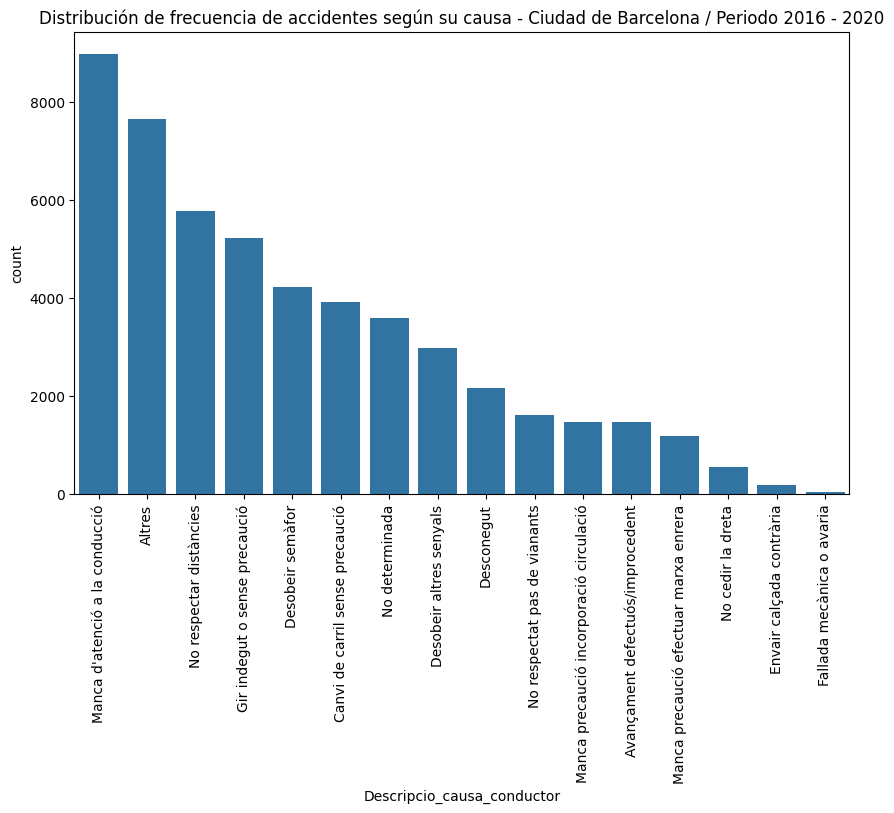

In [11]:
# Paso 12: Se muestra la distribución de frecuencias de los accidentes según las causas

plt.figure(figsize=(10, 6))
sns.countplot(data=df_unido, x='Descripcio_causa_conductor', order=df_unido['Descripcio_causa_conductor'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribución de frecuencia de accidentes según su causa - Ciudad de Barcelona / Periodo 2016 - 2020')
plt.show()

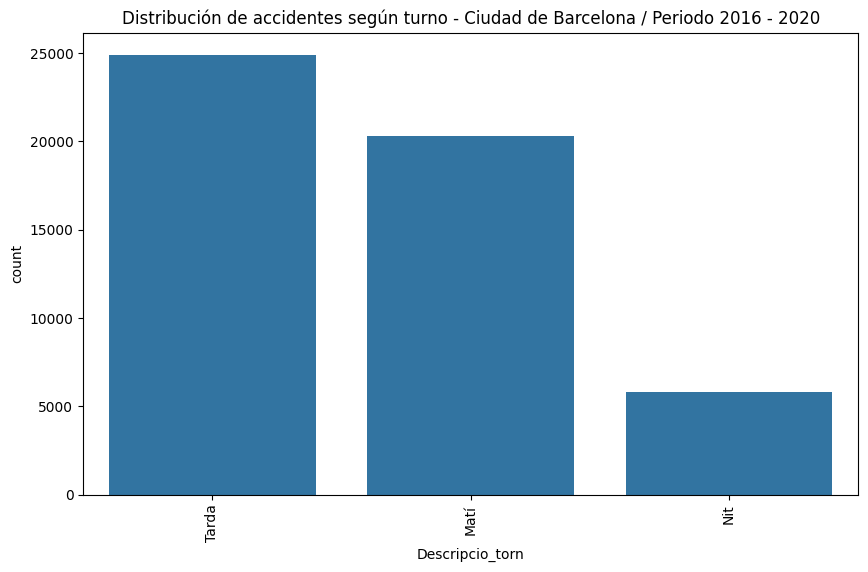

In [12]:
# Paso 13: Se muestra la distribución de frecuencias de los accidentes según el turno

plt.figure(figsize=(10, 6))
sns.countplot(data=df_unido, x='Descripcio_torn', order=df_unido['Descripcio_torn'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribución de accidentes según turno - Ciudad de Barcelona / Periodo 2016 - 2020')
plt.show()

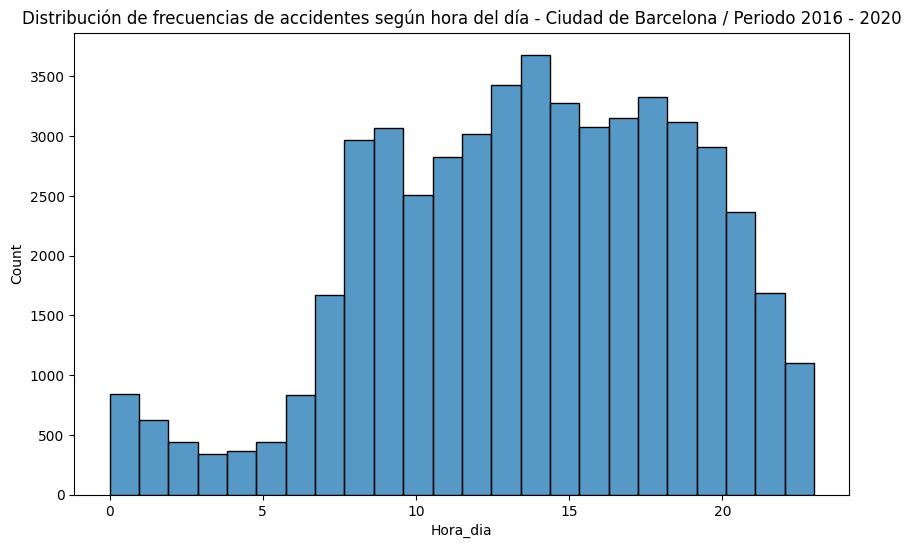

In [13]:
# Paso 14: Se muestra la distribución de frecuencias de los accidentes según la hora del día

plt.figure(figsize=(10, 6))
sns.histplot(data=df_unido, x='Hora_dia', bins=24, kde=False)
plt.title('Distribución de frecuencias de accidentes según hora del día - Ciudad de Barcelona / Periodo 2016 - 2020')
plt.show()

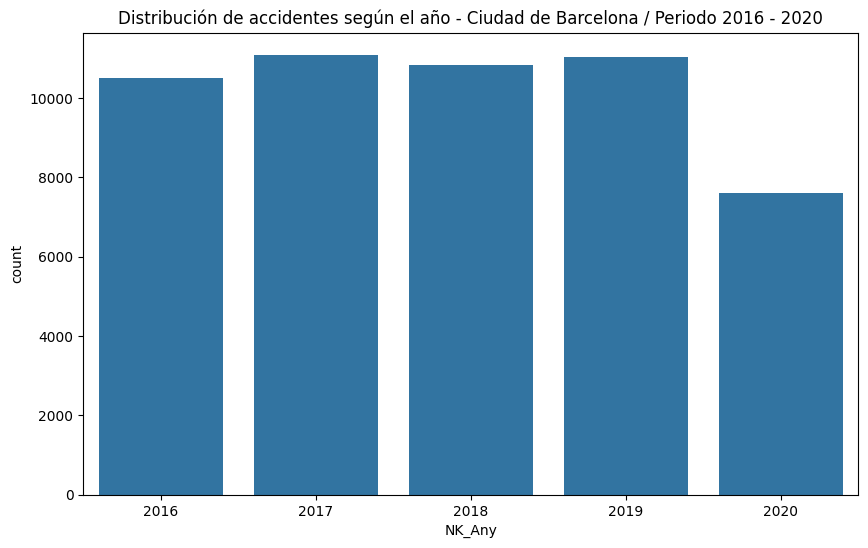

In [14]:
# Paso 15: Se muestra la distribución de frecuencias de los accidentes según la hora del día

plt.figure(figsize=(10, 6))
sns.countplot(data=df_unido, x='NK_Any')
plt.title('Distribución de accidentes según el año - Ciudad de Barcelona / Periodo 2016 - 2020')
plt.show()